In [1]:
import pandas as pd
from seaborn import heatmap
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
 

df = pd.read_csv("data.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [3]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [4]:
df.sample(5)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
697,298,4.71,Clear,Low,Morning,Bike,20,6.0,31
517,180,3.18,Rainy,Medium,Evening,Bike,21,3.0,42
688,254,6.68,Clear,High,Morning,Scooter,10,5.0,44
159,885,16.10,Clear,Low,Evening,Bike,25,0.0,64
596,288,11.08,Clear,Low,Evening,Scooter,28,2.0,58


In [5]:
df.isnull().sum()


Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [6]:

df.fillna(df.mean(numeric_only=True), inplace=True)




In [7]:

print(df.isnull().sum())


Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs     0
Delivery_Time_min          0
dtype: int64


In [8]:
df=pd.read_csv("data.csv")
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

/var/folders/dl/577b_nr10wl3sq2rzk9_mgt00000gn/T/ipykernel_95567/4293694107.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [9]:
print(df.isnull().sum())

Order_ID                   0
Distance_km                0
Weather                    0
Traffic_Level              0
Time_of_Day                0
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64


In [10]:
df = pd.read_csv("data.csv")
print(df.columns)

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')


In [11]:
df['Courier_Experience_yrs'] = df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].mean())

In [12]:
df

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [13]:
df.corr(numeric_only=True)

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
Order_ID,1.000000,-0.024483,-0.035100,0.012933,-0.036650
Distance_km,-0.024483,1.000000,-0.009037,-0.007713,0.780998
Preparation_Time_min,-0.035100,-0.009037,1.000000,-0.030353,0.307350
Courier_Experience_yrs,0.012933,-0.007713,-0.030353,1.000000,-0.089066
Delivery_Time_min,-0.036650,0.780998,0.307350,-0.089066,1.000000


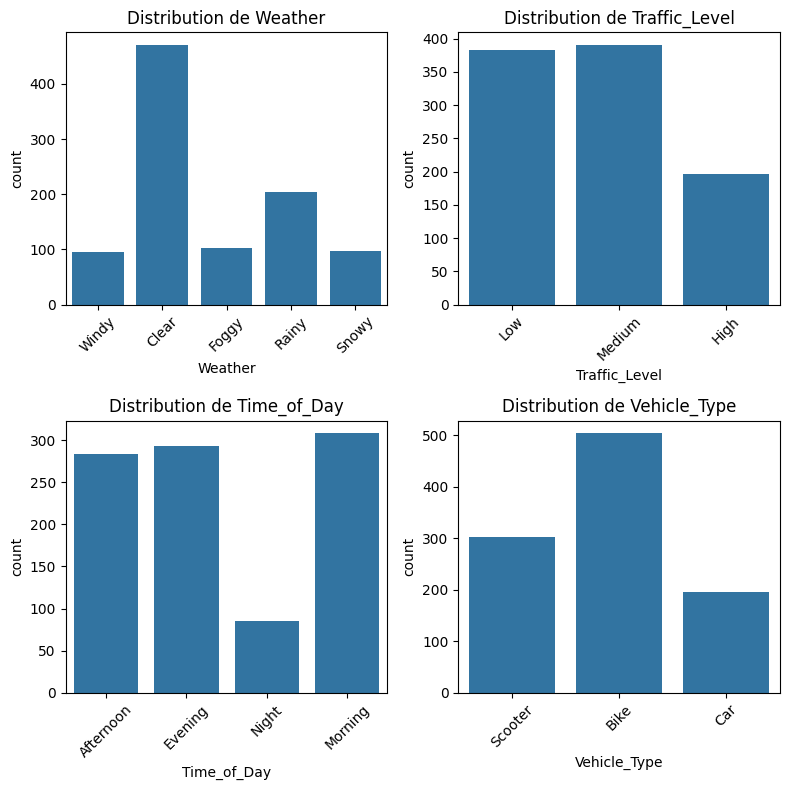

In [14]:
categorical_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

plt.figure(figsize=(8, 8))  
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)  
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution de {col}")
    plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

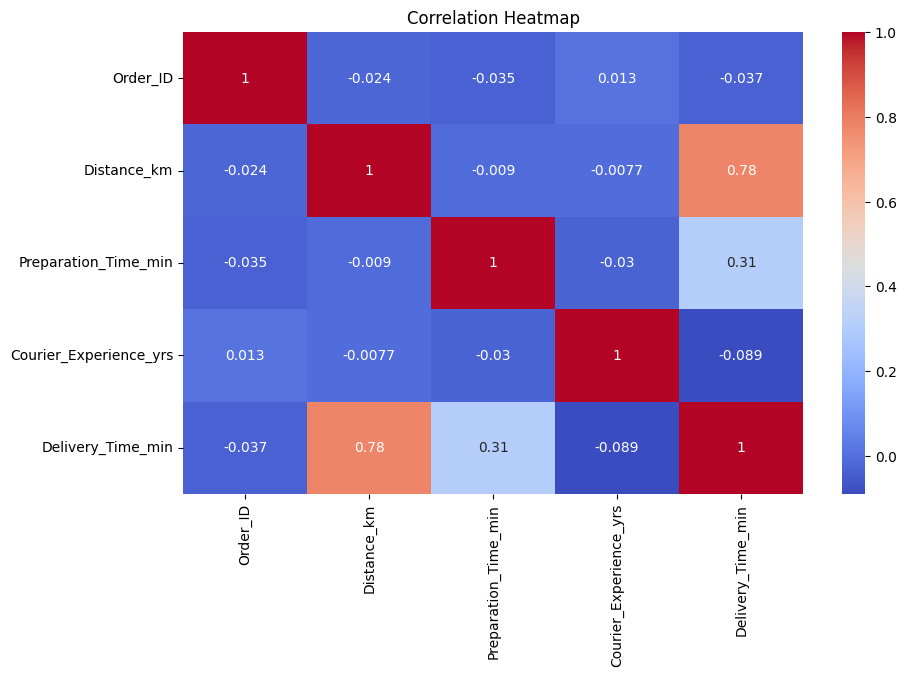

In [15]:
plt.figure(figsize=(10, 6))
heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')   
plt.show()

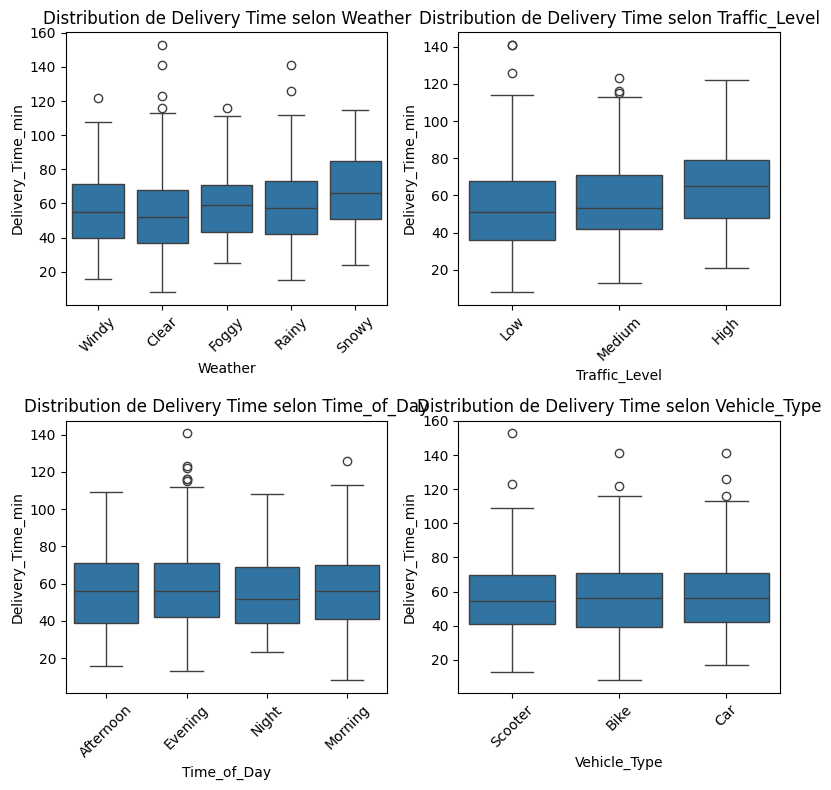

In [16]:
categorical_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

plt.figure(figsize=(8, 8))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=col, y='Delivery_Time_min')
    plt.title(f"Distribution de Delivery Time selon {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [17]:
columns_to_drop = ['Order_ID','Time_of_Day','Courier_Experience_yrs', 'Vehicle_Type']
df = df.drop(columns=columns_to_drop)

In [18]:
df.head()


,Distance_km,Weather,Traffic_Level,Preparation_Time_min,Delivery_Time_min
0,7.93,Windy,Low,12,43
1,16.42,Clear,Medium,20,84
2,9.52,Foggy,Low,28,59
3,7.44,Rainy,Medium,5,37
4,19.03,Clear,Low,16,68


In [19]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error



# Separate features and target
x = df.drop('Delivery_Time_min', axis=1)
y = df['Delivery_Time_min']

# Identify columns
categorical_cols = x.select_dtypes(include=['object']).columns
numerical_cols = x.select_dtypes(include=['int64', 'float64']).columns

# Preprocessor: scale + encode
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop=None), categorical_cols)
    ])

# Define models
models = {
    "RandomForestRegressor": RandomForestRegressor(),
    "SVR": SVR()
}

#define the hyperparameters

parameter_grid = {
    RandomForestRegressor: {
        'model__n_estimators': [100, 200, 500],
        'model__max_depth': [5, 10, 20],
        'model__random_state' :[42]
    },
    SVR: {
        'model__kernel': ['linear', 'rbf'],
        'model__gamma': ['scale', 'auto'],
        'model__C': [0.1, 1, 10]
    }
}
# Define K-Fold
KF = KFold(n_splits=5, shuffle=True, random_state=42)


# Loop through models
for name, model in models.items():
    print(f"🔹 Training model: {name}")
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('select', SelectKBest(score_func=f_regression, k=5)),
        ('model', model)  
    ])
    modeltype = type(model)

    grid_search = GridSearchCV(
        estimator= pipeline,
        param_grid=parameter_grid[modeltype],
        cv= KF,
        scoring= 'r2',
        n_jobs= 1
    )

    # Cross-validation
    scores = cross_val_score(pipeline, x, y, cv=KF, scoring='r2')
    grid_search.fit(x,y)
    best_model = grid_search.best_estimator_
    y_predict= best_model.predict(x)
    r2 = r2_score(y,y_predict)
    MAE = mean_absolute_error(y,y_predict)
    

    print(f"✅ {name} - R² score with best estimator: {r2:.3f}")
    print(f"✅ {name} - MAE score with best estimator: {MAE:.3f}")
    print("----")


🔹 Training model: RandomForestRegressor
✅ RandomForestRegressor - R² score with best estimator: 0.788
✅ RandomForestRegressor - MAE score with best estimator: 6.900
----
🔹 Training model: SVR
✅ SVR - R² score with best estimator: 0.751
✅ SVR - MAE score with best estimator: 6.958
----
